### Importing Packages

In [1]:
%pip install pandas numpy pydicom matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import pydicom
#import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


### Defining Data Preproccessing Function

In [4]:
def date_format(date):
    date = str(date)
    formatted_date = f"{date[:4]}-{date[4:6]}-{date[6:]}"
    return formatted_date

In [5]:
def time_format(time):
    time = str(time)
    time = time.split(".")[0]
    while len(time) != 6:
        time = "0" + time
    formatted_time = f"{time[:2]}:{time[2:4]}:{time[4:6]}"
    return formatted_time

In [6]:
def convert_datetime(input_date):
    return datetime.fromisoformat(input_date)

### Loading Data

In [7]:
subset = pd.read_csv("mimic_iv_subset.csv")

subset

,subject_id,hadm_id,stay_id,admittime,dischtime,chronic_pulmonary_disease,sepsis3,los
0,18421337,22413411,30000484,2136-01-14 17:22:00,2136-01-24 16:00:00,0,True,9 days 22:38:00
1,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00
2,16513856,24463832,30001446,2186-04-11 15:01:00,2186-04-17 18:30:00,0,True,6 days 03:29:00
3,10656173,25778760,30001555,2177-09-10 01:08:00,2177-10-14 19:00:00,0,True,34 days 17:52:00
4,17921898,28841024,30002415,2126-12-16 01:00:00,2126-12-21 18:09:00,0,True,5 days 17:09:00
...,...,...,...,...,...,...,...,...
73176,16953641,24156036,37133288,2162-06-01 03:54:00,2162-06-12 17:35:00,0,False,11 days 13:41:00
73177,19681149,29928525,38464737,2163-12-15 14:25:00,2163-12-20 13:15:00,0,False,4 days 22:50:00
73178,15510752,23313977,38876423,2145-04-06 00:44:00,2145-04-07 12:00:00,0,False,1 day 11:16:00
73179,12314723,21338250,32149826,2157-07-20 08:10:00,2157-07-26 15:45:00,1,False,6 days 07:35:00


In [8]:
segmented = pd.read_csv("chest-xrays/CXLSeg-segmented.csv")

# segmented['DicomPath'].iloc[0]

In [9]:
metadata = pd.read_csv("chest-xrays/CXLSeg-metadata.csv")

metadata.head()

,dicom_id,subject_id,study_id,Reports,ViewPosition,PerformedProcedureStepDescription,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,No acute cardiopulmonary process.,PA,CHEST (PA AND LAT),3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,No acute cardiopulmonary abnormality.,PA,CHEST (PA AND LAT),3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,No acute intrathoracic process.,AP,CHEST (PORTABLE AP),2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN
3,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,10000032,53911762,No acute intrathoracic process.,AP,CHEST (PORTABLE AP),2906,2258,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,Erect
4,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,10000032,56699142,No acute cardiopulmonary process.,AP,CHEST (PORTABLE AP),3056,2544,21800805,234424.765,CHEST (PORTABLE AP),antero-posterior,NaN


In [10]:
# xray = pd.read_csv("mimic-cxr-2.0.0-metadata.csv")

# xray

### Preprocessing Data

In [11]:
subset["admittime"] = subset["admittime"].apply(convert_datetime)
subset["dischtime"] = subset["dischtime"].apply(convert_datetime)

In [12]:
metadata = metadata.assign(formatted_date = metadata["StudyDate"].apply(date_format))
metadata = metadata.assign(formatted_time = metadata["StudyTime"].apply(time_format))
metadata = metadata.assign(studytime = (metadata["formatted_date"] + " " + metadata["formatted_time"]).apply(convert_datetime))

In [13]:
# xray = xray.assign(formatted_date = xray["StudyDate"].apply(date_format))
# xray = xray.assign(formatted_time = xray["StudyTime"].apply(time_format))
# xray = xray.assign(studytime = (xray["formatted_date"] + " " + xray["formatted_time"]).apply(convert_datetime))

In [14]:
meta_merge = metadata[["subject_id", "study_id", "ViewPosition", "studytime"]]

meta_merge

,subject_id,study_id,ViewPosition,studytime
0,10000032,50414267,PA,2180-05-06 21:30:14
1,10000032,53189527,PA,2180-06-26 16:55:00
2,10000032,53911762,AP,2180-07-23 08:05:56
3,10000032,53911762,AP,2180-07-23 08:05:56
4,10000032,56699142,AP,2180-08-05 23:44:24
...,...,...,...,...
243319,19999733,57132437,PA,2152-07-08 22:45:50
243320,19999733,57132437,PA,2152-07-08 22:45:50
243321,19999987,55368167,AP,2145-11-04 05:14:48
243322,19999987,58621812,AP,2145-11-02 20:28:09


In [15]:
# xray_merge = xray[["subject_id", "study_id", "ViewPosition", "studytime"]]

# xray_merge

In [16]:
merging = subset.merge(meta_merge, left_on = "subject_id", right_on = "subject_id")
merging

,subject_id,hadm_id,stay_id,admittime,dischtime,chronic_pulmonary_disease,sepsis3,los,study_id,ViewPosition,studytime
0,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,50804027,AP,2194-05-06 09:40:46
1,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,52247909,PA,2193-12-29 00:12:16
2,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,53803118,AP,2193-11-11 13:32:57
3,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,55062582,AP,2193-11-16 21:50:45
4,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,55490538,AP,2194-05-04 08:28:30
...,...,...,...,...,...,...,...,...,...,...,...
376533,15754398,24924327,30970584,2150-09-03 06:30:00,2150-09-11 14:09:00,0,False,8 days 07:39:00,52232141,AP,2150-09-03 08:25:34
376534,15754398,24924327,30970584,2150-09-03 06:30:00,2150-09-11 14:09:00,0,False,8 days 07:39:00,52871799,AP,2150-09-03 20:07:27
376535,15754398,24924327,30970584,2150-09-03 06:30:00,2150-09-11 14:09:00,0,False,8 days 07:39:00,58185683,AP,2150-09-04 04:55:36
376536,15754398,24924327,30970584,2150-09-03 06:30:00,2150-09-11 14:09:00,0,False,8 days 07:39:00,58210659,AP,2150-09-04 11:47:53


In [17]:
matched_dates = merging[(merging["studytime"] >= merging["admittime"]) & (merging["studytime"] <= merging["dischtime"])].reset_index(drop = True)

matched_dates

,subject_id,hadm_id,stay_id,admittime,dischtime,chronic_pulmonary_disease,sepsis3,los,study_id,ViewPosition,studytime
0,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,55490538,AP,2194-05-04 08:28:30
1,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,56369155,AP,2194-04-30 08:33:53
2,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,57440284,AP,2194-04-29 06:25:10
3,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,57520242,AP,2194-05-02 10:45:39
4,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,0,True,8 days 07:46:00,57688955,AP,2194-05-01 08:06:11
...,...,...,...,...,...,...,...,...,...,...,...
107770,13096583,20322847,35254911,2167-07-30 18:01:00,2167-08-10 12:30:00,0,False,10 days 18:29:00,57452898,AP,2167-08-05 10:21:56
107771,15754398,24924327,30970584,2150-09-03 06:30:00,2150-09-11 14:09:00,0,False,8 days 07:39:00,52232141,AP,2150-09-03 08:25:34
107772,15754398,24924327,30970584,2150-09-03 06:30:00,2150-09-11 14:09:00,0,False,8 days 07:39:00,52871799,AP,2150-09-03 20:07:27
107773,15754398,24924327,30970584,2150-09-03 06:30:00,2150-09-11 14:09:00,0,False,8 days 07:39:00,58185683,AP,2150-09-04 04:55:36


In [18]:
segmented_merged = segmented[["subject_id", "study_id", "dicom_id", "DicomPath", "No Finding"]]
segmented_merged["No Finding"] = segmented_merged["No Finding"].fillna(-1)
segmented_merged["Abnormal"] = (segmented_merged["No Finding"] * -1)
segmented_merged = segmented_merged.drop(columns = ["No Finding"])

segmented_merged

/var/folders/kb/s8dqbsbd69z1lpcq7967w6g40000gn/T/ipykernel_11907/4022369188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmented_merged["No Finding"] = segmented_merged["No Finding"].fillna(-1)
/var/folders/kb/s8dqbsbd69z1lpcq7967w6g40000gn/T/ipykernel_11907/4022369188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmented_merged["Abnormal"] = (segmented_merged["No Finding"] * -1)


,subject_id,study_id,dicom_id,DicomPath,Abnormal
0,10000032,50414267,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,files/p10/p10000032/s50414267/02aa804e-bde0afd...,-1.0
1,10000032,53189527,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,files/p10/p10000032/s53189527/2a2277a9-b0ded15...,-1.0
2,10000032,53911762,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,files/p10/p10000032/s53911762/68b5c4b1-227d048...,-1.0
3,10000032,53911762,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,files/p10/p10000032/s53911762/fffabebf-74fd3a1...,-1.0
4,10000032,56699142,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,files/p10/p10000032/s56699142/ea030e7a-2e3b134...,-1.0
...,...,...,...,...,...
243319,19999733,57132437,3fcd0406-9b111603-feae7033-96632b3a-111333e5,files/p19/p19999733/s57132437/3fcd0406-9b11160...,-1.0
243320,19999733,57132437,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,files/p19/p19999733/s57132437/428e2c18-5721d8f...,-1.0
243321,19999987,55368167,58766883-376a15ce-3b323a28-6af950a0-16b793bd,files/p19/p19999987/s55368167/58766883-376a15c...,1.0
243322,19999987,58621812,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,files/p19/p19999987/s58621812/7ba273af-3d290f8...,1.0


In [19]:
complete_merged = matched_dates.merge(segmented_merged, on = ["subject_id", "study_id"])[["subject_id", "hadm_id", "stay_id", "study_id", 
                                                                       "admittime", "dischtime", "studytime", "ViewPosition",
                                                                       "dicom_id", "DicomPath", "Abnormal", "los", 
                                                                       "chronic_pulmonary_disease", "sepsis3"]]

complete_merged

,subject_id,hadm_id,stay_id,study_id,admittime,dischtime,studytime,ViewPosition,dicom_id,DicomPath,Abnormal,los,chronic_pulmonary_disease,sepsis3
0,12207593,22795209,30000646,55490538,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-05-04 08:28:30,AP,e076666b-e2e941fe-7206948e-96d77b1f-790ebb2c,files/p12/p12207593/s55490538/e076666b-e2e941f...,1.0,8 days 07:46:00,0,True
1,12207593,22795209,30000646,56369155,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-04-30 08:33:53,AP,7f124ef7-a1714162-b7e9da18-5862d297-3fd8f3a9,files/p12/p12207593/s56369155/7f124ef7-a171416...,1.0,8 days 07:46:00,0,True
2,12207593,22795209,30000646,57440284,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-04-29 06:25:10,AP,49d77ea6-5f9a013f-d0e6c33e-bb3aae40-88d57b43,files/p12/p12207593/s57440284/49d77ea6-5f9a013...,1.0,8 days 07:46:00,0,True
3,12207593,22795209,30000646,57520242,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-05-02 10:45:39,AP,40f24d85-94293a52-b7e4961d-d2ad9561-864efe77,files/p12/p12207593/s57520242/40f24d85-94293a5...,-1.0,8 days 07:46:00,0,True
4,12207593,22795209,30000646,57688955,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-05-01 08:06:11,AP,f725e388-3b557432-84d5882b-4c406d73-68132627,files/p12/p12207593/s57688955/f725e388-3b55743...,-1.0,8 days 07:46:00,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135876,13096583,20322847,35254911,57452898,2167-07-30 18:01:00,2167-08-10 12:30:00,2167-08-05 10:21:56,AP,291d4cd9-78036eac-9f682833-a7cf1fcb-b05106fc,files/p13/p13096583/s57452898/291d4cd9-78036ea...,1.0,10 days 18:29:00,0,False
135877,15754398,24924327,30970584,52232141,2150-09-03 06:30:00,2150-09-11 14:09:00,2150-09-03 08:25:34,AP,49851e5c-9eaa60d4-0bb0bc52-d3b30ef0-6bded685,files/p15/p15754398/s52232141/49851e5c-9eaa60d...,-1.0,8 days 07:39:00,0,False
135878,15754398,24924327,30970584,52871799,2150-09-03 06:30:00,2150-09-11 14:09:00,2150-09-03 20:07:27,AP,19a40edf-c3e21c44-93e035a6-caf1d6dc-f22a8105,files/p15/p15754398/s52871799/19a40edf-c3e21c4...,1.0,8 days 07:39:00,0,False
135879,15754398,24924327,30970584,58185683,2150-09-03 06:30:00,2150-09-11 14:09:00,2150-09-04 04:55:36,AP,71dc37d3-41be0418-b5590a13-ad7d107e-425ab985,files/p15/p15754398/s58185683/71dc37d3-41be041...,1.0,8 days 07:39:00,0,False


In [20]:
complete_merged = complete_merged[(complete_merged["ViewPosition"] == "PA") | (complete_merged["ViewPosition"] == "AP")]

complete_merged["ViewPosition"].unique()

array(['AP', 'PA'], dtype=object)

### Subsetting Groups

In [21]:
only_pul = complete_merged[(complete_merged["chronic_pulmonary_disease"] == 1) & (complete_merged["sepsis3"] == False)]

only_pul.head()

,subject_id,hadm_id,stay_id,study_id,admittime,dischtime,studytime,ViewPosition,dicom_id,DicomPath,Abnormal,los,chronic_pulmonary_disease,sepsis3
92269,14979764,27549031,31087970,50266736,2134-04-06 20:17:00,2134-04-22 15:35:00,2134-04-08 14:55:05,AP,8a7544c4-e140d6fe-5e443f62-e4892626-46b614df,files/p14/p14979764/s50266736/8a7544c4-e140d6f...,-1.0,15 days 19:18:00,1,False
92270,14979764,27549031,31087970,57385446,2134-04-06 20:17:00,2134-04-22 15:35:00,2134-04-07 11:34:10,PA,cc9a0a14-9ed0cd1c-a86ccc52-5eb7d203-dd70fbdd,files/p14/p14979764/s57385446/cc9a0a14-9ed0cd1...,1.0,15 days 19:18:00,1,False
92272,16156625,27764818,33489946,50833675,2145-03-22 10:58:00,2145-03-28 15:50:00,2145-03-24 07:50:21,AP,9f24c8a6-78cfefb7-af1ae362-59160df1-c0413ccc,files/p16/p16156625/s50833675/9f24c8a6-78cfefb...,1.0,6 days 04:52:00,1,False
92273,16156625,27764818,33489946,56162623,2145-03-22 10:58:00,2145-03-28 15:50:00,2145-03-22 13:49:24,AP,6a8782de-b15139cf-30b531f2-34e23964-7cd6f343,files/p16/p16156625/s56162623/6a8782de-b15139c...,1.0,6 days 04:52:00,1,False
92291,13263843,20973180,33603458,55312260,2197-04-24 22:41:00,2197-04-30 14:00:00,2197-04-29 12:01:24,PA,22ebe993-418ddc79-44f5af39-3e2d7039-df6bd5fc,files/p13/p13263843/s55312260/22ebe993-418ddc7...,1.0,5 days 15:19:00,1,False


In [22]:
only_sep = complete_merged[(complete_merged["chronic_pulmonary_disease"] == 0) & (complete_merged["sepsis3"] == True)]

only_sep.head()

,subject_id,hadm_id,stay_id,study_id,admittime,dischtime,studytime,ViewPosition,dicom_id,DicomPath,Abnormal,los,chronic_pulmonary_disease,sepsis3
0,12207593,22795209,30000646,55490538,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-05-04 08:28:30,AP,e076666b-e2e941fe-7206948e-96d77b1f-790ebb2c,files/p12/p12207593/s55490538/e076666b-e2e941f...,1.0,8 days 07:46:00,0,True
1,12207593,22795209,30000646,56369155,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-04-30 08:33:53,AP,7f124ef7-a1714162-b7e9da18-5862d297-3fd8f3a9,files/p12/p12207593/s56369155/7f124ef7-a171416...,1.0,8 days 07:46:00,0,True
2,12207593,22795209,30000646,57440284,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-04-29 06:25:10,AP,49d77ea6-5f9a013f-d0e6c33e-bb3aae40-88d57b43,files/p12/p12207593/s57440284/49d77ea6-5f9a013...,1.0,8 days 07:46:00,0,True
3,12207593,22795209,30000646,57520242,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-05-02 10:45:39,AP,40f24d85-94293a52-b7e4961d-d2ad9561-864efe77,files/p12/p12207593/s57520242/40f24d85-94293a5...,-1.0,8 days 07:46:00,0,True
4,12207593,22795209,30000646,57688955,2194-04-27 18:43:00,2194-05-06 02:29:00,2194-05-01 08:06:11,AP,f725e388-3b557432-84d5882b-4c406d73-68132627,files/p12/p12207593/s57688955/f725e388-3b55743...,-1.0,8 days 07:46:00,0,True


In [23]:
both = complete_merged[(complete_merged["chronic_pulmonary_disease"] == 1) & (complete_merged["sepsis3"] == True)]

both.head()

,subject_id,hadm_id,stay_id,study_id,admittime,dischtime,studytime,ViewPosition,dicom_id,DicomPath,Abnormal,los,chronic_pulmonary_disease,sepsis3
6,11101925,23920532,30004018,51042714,2158-12-27 19:57:00,2159-01-12 17:45:00,2159-01-02 11:52:30,AP,9d3b87b1-d4dae7a0-beada456-7f220a1d-66c88c7c,files/p11/p11101925/s51042714/9d3b87b1-d4dae7a...,1.0,15 days 21:48:00,1,True
7,11101925,23920532,30004018,51158180,2158-12-27 19:57:00,2159-01-12 17:45:00,2158-12-28 08:03:30,AP,a35e7265-f463050c-908987ea-04154d98-4579112f,files/p11/p11101925/s51158180/a35e7265-f463050...,1.0,15 days 21:48:00,1,True
8,11101925,23920532,30004018,53005350,2158-12-27 19:57:00,2159-01-12 17:45:00,2158-12-29 01:14:43,AP,6d89c83e-c451a4ea-55a00c77-cef04030-6b19b58a,files/p11/p11101925/s53005350/6d89c83e-c451a4e...,1.0,15 days 21:48:00,1,True
9,11101925,23920532,30004018,56257044,2158-12-27 19:57:00,2159-01-12 17:45:00,2159-01-01 19:33:12,AP,d3a05780-e0641e45-12215557-68bb2aad-6653abd8,files/p11/p11101925/s56257044/d3a05780-e0641e4...,1.0,15 days 21:48:00,1,True
10,11101925,23920532,30004018,57636577,2158-12-27 19:57:00,2159-01-12 17:45:00,2158-12-28 15:57:38,AP,1d2a1722-29a83af2-769ed168-86a3c16e-3cc2fe94,files/p11/p11101925/s57636577/1d2a1722-29a83af...,1.0,15 days 21:48:00,1,True


In [24]:
neither = complete_merged[(complete_merged["chronic_pulmonary_disease"] == 0) & (complete_merged["sepsis3"] == False)]

neither.head()

,subject_id,hadm_id,stay_id,study_id,admittime,dischtime,studytime,ViewPosition,dicom_id,DicomPath,Abnormal,los,chronic_pulmonary_disease,sepsis3
92256,15819509,22689453,37441032,50085744,2174-10-29 19:05:00,2174-11-19 15:15:00,2174-11-01 04:13:29,AP,f4f1d90b-2d857d5a-cb8fabf4-137ceef0-035aff5f,files/p15/p15819509/s50085744/f4f1d90b-2d857d5...,1.0,20 days 20:10:00,0,False
92257,15819509,22689453,37441032,55767239,2174-10-29 19:05:00,2174-11-19 15:15:00,2174-10-31 09:02:41,AP,a1e25c67-0e3e9c03-d0fe7d4d-305da6dc-fe56a81d,files/p15/p15819509/s55767239/a1e25c67-0e3e9c0...,-1.0,20 days 20:10:00,0,False
92258,15819509,22689453,37441032,55786670,2174-10-29 19:05:00,2174-11-19 15:15:00,2174-11-03 04:24:33,AP,4a1ededd-4e865556-e4def554-e39cd393-cd1812a4,files/p15/p15819509/s55786670/4a1ededd-4e86555...,-1.0,20 days 20:10:00,0,False
92259,15819509,22689453,37441032,55786670,2174-10-29 19:05:00,2174-11-19 15:15:00,2174-11-03 04:24:33,AP,bfc9bc33-25a23ac7-3d118654-874f6586-0eb7f947,files/p15/p15819509/s55786670/bfc9bc33-25a23ac...,-1.0,20 days 20:10:00,0,False
92260,15819509,22689453,37441032,55786670,2174-10-29 19:05:00,2174-11-19 15:15:00,2174-11-03 04:24:33,AP,4a1ededd-4e865556-e4def554-e39cd393-cd1812a4,files/p15/p15819509/s55786670/4a1ededd-4e86555...,-1.0,20 days 20:10:00,0,False


In [25]:
sum([22, 11, 45, 22])

100

In [26]:
100 * (30750 / complete_merged.shape[0])

22.630095451166827

In [27]:
final_toy = pd.concat([neither.sample(22), only_pul.sample(11), only_sep.sample(45), both.sample(22)]).reset_index(drop = True)

final_toy

,subject_id,hadm_id,stay_id,study_id,admittime,dischtime,studytime,ViewPosition,dicom_id,DicomPath,Abnormal,los,chronic_pulmonary_disease,sepsis3
0,11942901,24615963,39025349,59221738,2138-05-02 05:08:00,2138-05-24 15:58:00,2138-05-05 08:03:49,AP,8123cf3d-9b238f17-093d9bf4-3b62120d-432e7931,files/p11/p11942901/s59221738/8123cf3d-9b238f1...,1.0,22 days 10:50:00,0,False
1,16483343,27615389,30590972,51527263,2117-02-07 02:05:00,2117-03-16 01:55:00,2117-02-14 21:24:03,AP,7cdd21a6-b11a80ee-2e5ae7d6-e442920d-74b97890,files/p16/p16483343/s51527263/7cdd21a6-b11a80e...,1.0,36 days 23:50:00,0,False
2,17398597,29516551,33828989,51404116,2182-03-23 21:08:00,2182-04-08 16:35:00,2182-04-03 07:34:46,AP,c1c89942-829b4c5c-0160edcb-1d10f838-55f478c0,files/p17/p17398597/s51404116/c1c89942-829b4c5...,1.0,15 days 19:27:00,0,False
3,19857331,21049118,30545568,55009493,2136-03-06 02:15:00,2136-03-31 11:37:00,2136-03-20 10:00:26,AP,174a748b-65804a26-89cc5de4-186357fb-554bb538,files/p19/p19857331/s55009493/174a748b-65804a2...,1.0,25 days 09:22:00,0,False
4,11760589,26001994,38320865,59288094,2168-08-12 14:40:00,2168-08-17 16:49:00,2168-08-12 17:40:35,PA,74d95d14-93e4c08e-5b7a66d6-852cec9c-1751fcc8,files/p11/p11760589/s59288094/74d95d14-93e4c08...,1.0,5 days 02:09:00,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15945590,25890171,39278284,58280874,2125-02-19 20:27:00,2125-03-09 17:05:00,2125-02-24 00:12:29,AP,b3d159b0-8fcca11a-c68dde70-fe7b3e77-323953d6,files/p15/p15945590/s58280874/b3d159b0-8fcca11...,-1.0,17 days 20:38:00,1,True
96,19348906,28461797,31162847,52487284,2157-05-08 07:15:00,2157-05-12 14:54:00,2157-05-09 10:26:27,AP,4c66922c-fddc70f9-1da0ff66-14085ee6-9c571329,files/p19/p19348906/s52487284/4c66922c-fddc70f...,1.0,4 days 07:39:00,1,True
97,13681651,27205709,34817308,51996226,2188-11-21 11:37:00,2188-12-08 18:25:00,2188-11-26 14:47:33,AP,8d7b5788-abc0a023-4902fb94-274c6846-edfdd047,files/p13/p13681651/s51996226/8d7b5788-abc0a02...,1.0,17 days 06:48:00,1,True
98,18998394,23956728,34588051,54289309,2168-10-28 03:51:00,2168-11-04 14:39:00,2168-11-04 12:05:09,AP,44a41c15-ff5879c9-6f4832e8-6b3389a0-1c0793fd,files/p18/p18998394/s54289309/44a41c15-ff5879c...,1.0,7 days 10:48:00,1,True


In [28]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [29]:
import cv2

In [30]:
# path = 'chest-xrays/'+final_toy['DicomPath'].iloc[0]
# image = cv2.imread(path)
# image.shape


def pad_image(path, target_size):
    image = cv2.imread(path)
    # Calculate padding
    height, width, channels = image.shape
    delta_h = target_size - height
    delta_w = target_size - width
    top = delta_h // 2
    bottom = delta_h - top
    left = delta_w // 2
    right = delta_w - left
    # Pad the image
    padded_image = np.pad(image, ((top, bottom), (left, right), (0, 0)), mode='constant', constant_values=0)
    return padded_image

In [31]:
X = final_toy['DicomPath'].apply(lambda x: pad_image('chest-xrays/'+x, 3056))

In [32]:
X[0].shape

(3056, 3056, 3)

In [33]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [34]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [36]:
import tensorflow as tf

In [66]:
X_array = np.stack(X.values)
X_resized = tf.image.resize(X_array, (224, 224))

X_normalized = X_resized/255.0
y = final_toy['Abnormal']

X_train = X_resized[0:70]
X_test= X_resized[70:]
y_train = y[0:70]
y_test = y[70:]

X_train.shape

TensorShape([70, 224, 224, 3])

In [62]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6361 - loss: 1.2094 - val_accuracy: 0.9000 - val_loss: 0.9723
Epoch 2/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6700 - loss: 1.1646 - val_accuracy: 0.9000 - val_loss: 0.9730
Epoch 3/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7000 - loss: 1.4308 - val_accuracy: 0.9000 - val_loss: 0.9699
Epoch 4/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6617 - loss: 1.4216 - val_accuracy: 0.9000 - val_loss: 0.9673
Epoch 5/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6194 - loss: 1.2817 - val_accuracy: 0.9000 - val_loss: 0.9669
Epoch 6/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7000 - loss: 1.5175 - val_accuracy: 0.9000 - val_loss: 0.9686
Epoch 7/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6167 - loss: 1.6203 - val_accuracy: 0.9000 - val_loss: 0.9680
Epoch 8/8
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7000 - loss: 1.2858 - val_accuracy: 0.9000 - val_loss: 0.9683
Test loss: 0.96693783998

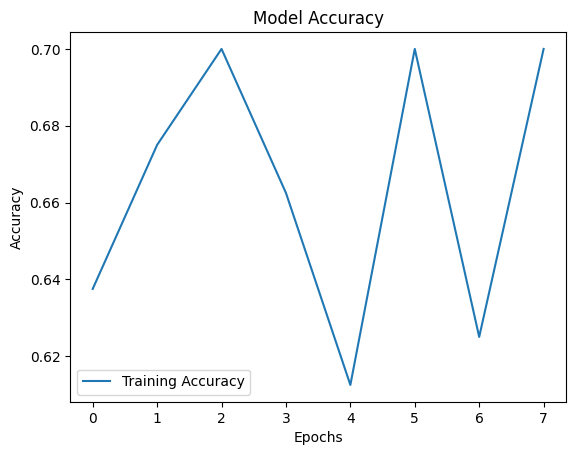

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adadelta

# Initialize the model
model = Sequential()

# First Conv2D layer with L2 regularization
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 3),
                 kernel_regularizer=l2(0.01)))  # L2 regularization with lambda of 0.01

# Second Conv2D layer with L2 regularization
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))

# MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Increase dropout rate to 0.5
model.add(Dropout(0.5))  # Increased from 0.25 to 0.5

# Flatten the output to feed into the Dense layer
model.add(Flatten())

# Dense layer with 128 units and increased dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Increased dropout

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss
model.compile(loss='binary_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the training data
datagen.fit(X_train)

# Train the model using the augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=50),
                    epochs=8,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Print training and validation accuracy history
print("Training Accuracy History:", history.history['accuracy'])
print("Validation Accuracy History:", history.history['val_accuracy'])

# Optionally, you can plot the accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.3771 - loss: 3.0210
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 0.6164 - loss: 2.9003
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 683ms/step - accuracy: 0.4791 - loss: 2.4258
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.2978 - loss: 2.6397
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 681ms/step - accuracy: 0.5763 - loss: 2.6410
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.5514 - loss: 2.1336
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.4499 - loss: 1.7267
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 686ms/step - accuracy: 0.4660 - loss: 1.9905
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 714ms/step - accuracy: 0.6741 - loss: 1.8964
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.6951 - loss: 1.7281
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.4993 - loss: 1.7284
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 726ms/step - accuracy: 0.5417 - lo

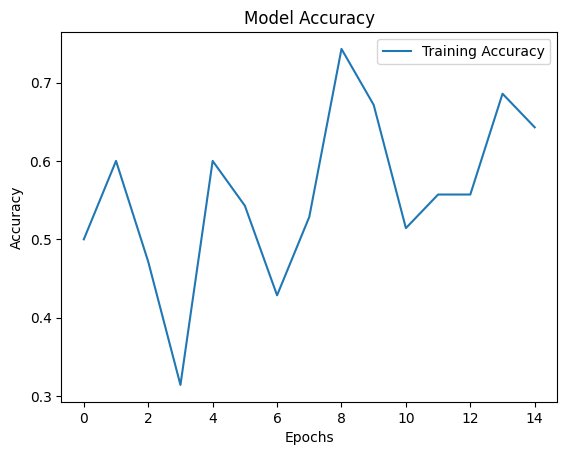

In [67]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Load ResNet50 model pre-trained on ImageNet, excluding the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers so that they are not updated during training
base_model.trainable = False

# Build the custom model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Global pooling to reduce dimensionality

# Adding a custom dense layer with L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization

# Dropout for regularization
model.add(Dropout(0.5))  # Increased dropout

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the training data
datagen.fit(X_train)

# Train the model using the augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=15,
                    verbose=1,
                    callbacks=[early_stopping])

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Optionally, you can print the training accuracy over epochs
print("Training Accuracy History:", history.history['accuracy'])

# Optionally, you can plot the accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
